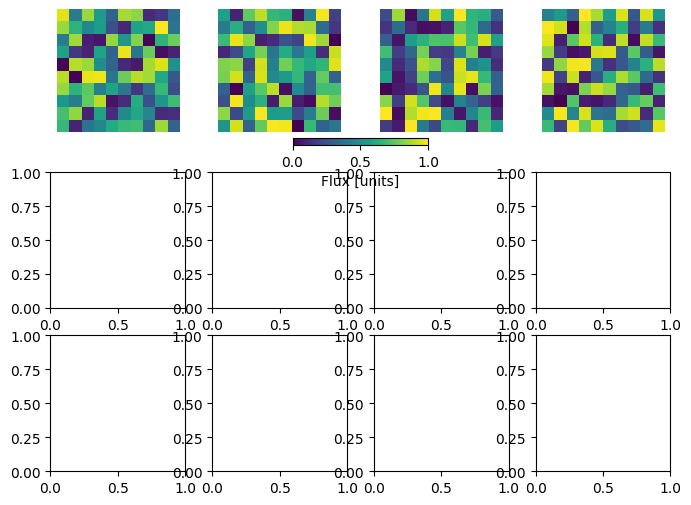

In [2]:
import numpy as np

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 4, figsize=(8, 6),
                        gridspec_kw={'height_ratios': [1, 1, 1]})

# Use placeholder images: four random (10x10) images
images = [np.random.rand(10, 10) for _ in range(4)]
vmin, vmax = 0, 1

for ax, im in zip(axs[0], images):
    im0 = ax.imshow(im, origin='lower', vmin=vmin, vmax=vmax)
    ax.axis('off')

fig.colorbar(im0, ax=axs[0, :], orientation='horizontal',
             fraction=0.05, pad=0.05, label='Flux [units]')

# super-res, GT, residual, zoom panels in axs[1,0], axs[2,0], etc.
# … annotate boxes via Rectangle patches …


In [ ]:
def linear_flux_recovery_plot(matched_catalog, save_path=None):
    # Set up the subplots with shared y-axis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
    
    # Define plot limits and a true line for 1:1 recovery
    xmax = 30  # mJy
    true_line = np.linspace(0, xmax + 5, 100)
    # Plot the first dataset
    ax1.errorbar(
        matched_catalog["S450"], 
        matched_catalog["S500SR"], 
        xerr=matched_catalog["S450_total_err"], 
        markersize=6, 
        fmt='o', 
        ecolor='gray',
        elinewidth=1,
        capsize=3,
        color='blue', 
        label=label1, 
        alpha=0.8
    )
    ax1.plot(
        true_line, 
        true_line,
        'r--', 
        label="1:1 Recovery", 
        linewidth=2
    )

    ax1.set_xlabel(r"SCUBA-2 $450 \mu m$ Source Flux $S_{in}$ [mJy]", fontsize=12)
    ax1.set_ylabel(r"Super-resolved $500 \mu m$ Source Flux $S_{SR}$ [mJy]", fontsize=12)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.set_xlim([1, xmax + 5])
    ax1.set_ylim([1, xmax + 5])
    ax1.legend(fontsize=12, frameon=False)
    
    # Plot the second dataset
    ax2.errorbar(
        matched_catalog["S500corr"], 
        matched_catalog["S500SR"], 
        xerr=matched_catalog["S500corr_total_err"], 
        markersize=6, 
        fmt='o', 
        ecolor='gray',
        elinewidth=1,
        capsize=3,
        color='blue', 
        label=label2, 
        alpha=0.8
    )

    ax2.plot(
        true_line, 
        true_line,
        'r--', 
        label="1:1 Recovery", 
        linewidth=2
    )

    ax2.set_xlabel(r"SCUBA-2 Converted $500 \mu m$ Source Flux $S_{in}$ [mJy]", fontsize=12)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.set_xlim([1, xmax + 5])
    ax2.legend(fontsize=12, frameon=False)
    
    # Adjust spacing between plots to remove horizontal space
    plt.subplots_adjust(wspace=0)
    ax1.grid(True)
    ax2.grid(True)
    
    # Save the figure
    plt.savefig(save_path, dpi=350, bbox_inches='tight')
    plt.show()